<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [12]:
sac_csv = '../data/sacramento_real_estate_transactions.csv'

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

%matplotlib inline

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [43]:
# A:
houses = pd.read_csv(sac_csv)
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


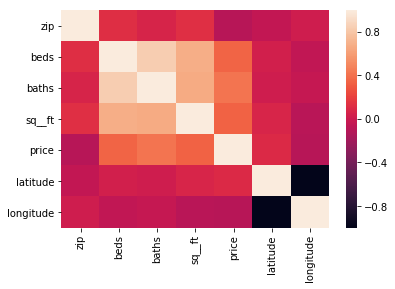

In [44]:
sns.heatmap(houses.corr())

In [45]:
houses.sale_date.describe()

count                              985
unique                               5
top       Mon May 19 00:00:00 EDT 2008
freq                               268
Name: sale_date, dtype: object

In [46]:
houses['sale_date'] = pd.to_datetime(houses.sale_date)

In [47]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null datetime64[ns]
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 92.4+ KB


In [48]:
houses.sale_date.head()

0   2008-05-21 04:00:00
1   2008-05-21 04:00:00
2   2008-05-21 04:00:00
3   2008-05-21 04:00:00
4   2008-05-21 04:00:00
Name: sale_date, dtype: datetime64[ns]

In [49]:
houses['sale_year'] = houses.sale_date.dt.year
houses['sale_month'] = houses.sale_date.dt.month
houses['sale_day'] = houses.sale_date.dt.day

In [50]:
houses.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,sale_year,sale_month,sale_day
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21 04:00:00,59222,38.631913,-121.434879,2008,5,21
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21 04:00:00,68212,38.478902,-121.431028,2008,5,21
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21 04:00:00,68880,38.618305,-121.443839,2008,5,21
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21 04:00:00,69307,38.616835,-121.439146,2008,5,21
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21 04:00:00,81900,38.519470,-121.435768,2008,5,21


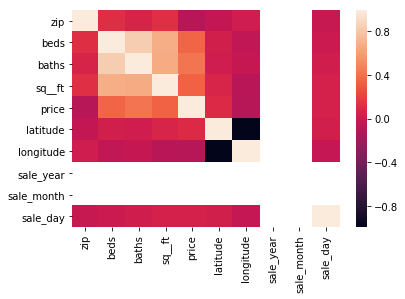

In [51]:
sns.heatmap(houses.corr())

In [25]:
from pandas.plotting import scatter_matrix

In [54]:
houses.sale_date.dt.day.describe()

count    985.000000
mean      18.217259
std        2.131239
min       15.000000
25%       16.000000
50%       19.000000
75%       20.000000
max       21.000000
Name: sale_date, dtype: float64

In [33]:
houses.corr().abs()['price'].sort_values(ascending = False)

price         1.000000
baths         0.416718
beds          0.344752
sq__ft        0.339628
latitude      0.100806
zip           0.095918
longitude     0.094262
sale_day      0.053142
sale_year          NaN
sale_month         NaN
Name: price, dtype: float64

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

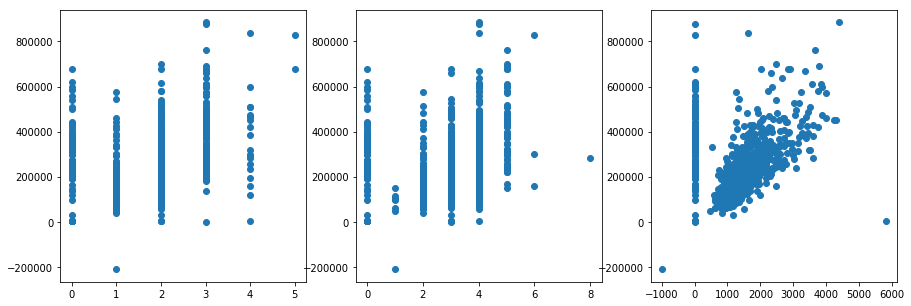

In [37]:
# A
X = houses[['baths', 'beds', 'sq__ft']]
y = houses.price
plt.figure(figsize = (15, 5))
plt.subplot(131)
plt.scatter(X['baths'], y)

plt.subplot(132)
plt.scatter(X['beds'], y)

plt.subplot(133)
plt.scatter(X['sq__ft'], y)

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [5]:
# A:

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [62]:
# A:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X[['sq__ft']], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [67]:
pipeline = Pipeline([PolynomialFeatures(), LinearRegression()])

TypeError: zip argument #1 must support iteration

In [77]:
poly = PolynomialFeatures(degree = 2)
x2 = poly.fit_transform(houses[['sq__ft']])
lr.fit(x2, y)
quad_pred = lr.predict(x2)
lr.fit(X, y)
lin_pred = lr.predict(X)

In [78]:
from sklearn.metrics import mean_squared_error

In [82]:
np.sqrt(mean_squared_error(y, quad_pred))


125106.13492627213

In [83]:
np.sqrt(mean_squared_error(y, lin_pred))

125730.28782008926

In [73]:
lr.coef_

array([ 0.00000000e+00, -3.67618681e+01,  3.00427389e-02])

In [56]:
print(lr.coef_, lr.intercept_)

[55.17721241] 161272.75277922262


### 6. Interpret the intercept. Interpret the slope.

In [57]:
# A:

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [58]:
# A:


### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [60]:
# A:
residuals = (lr.predict(X[['sq__ft']]) - y)**2

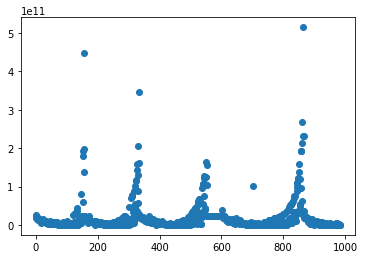

In [61]:
plt.plot(residuals, 'o')